# Guided Project: Story Telling Visualization On Exchange Rates

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
exchange_rates = pd.read_csv(r'C:\Users\Martin\Desktop\Datasets\euro exchange rate data\euro-daily-hist_1999_2021.csv')
exchange_rates.head()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,2021-09-20,NaN,1.6201,1.9558,6.2495,1.5056,1.0883,7.5726,NaN,25.432,...,86.0700,10.2173,1.5839,NaN,NaN,39.0620,10.1512,NaN,1.1711,17.3301
1,2021-09-17,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,...,85.4338,10.1553,1.5851,NaN,NaN,39.1450,10.1323,NaN,1.1780,17.1891
2,2021-09-16,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,...,85.2347,10.1518,1.5805,NaN,NaN,38.9180,9.9663,NaN,1.1763,17.0544
3,2021-09-15,NaN,1.6153,1.9558,6.1979,1.5004,1.0845,7.6069,NaN,25.318,...,85.9738,10.1360,1.5860,NaN,NaN,38.8650,9.9769,NaN,1.1824,16.8973
4,2021-09-14,NaN,1.6114,1.9558,6.1788,1.4951,1.0887,7.6168,NaN,25.389,...,86.1062,10.1453,1.5870,NaN,NaN,38.9270,9.9848,NaN,1.1814,16.8097


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5878 non-null   object 
 1   [Argentine peso ]         5383 non-null   object 
 2   [Australian dollar ]      5878 non-null   object 
 3   [Bulgarian lev ]          5476 non-null   object 
 4   [Brazilian real ]         5610 non-null   object 
 5   [Canadian dollar ]        5878 non-null   object 
 6   [Swiss franc ]            5878 non-null   object 
 7   [Chinese yuan renminbi ]  5610 non-null   object 
 8   [Cypriot pound ]          2346 non-null   object 
 9   [Czech koruna ]           5878 non-null   object 
 10  [Danish krone ]           5878 non-null   object 
 11  [Algerian dinar ]         5383 non-null   object 
 12  [Estonian kroon ]         3130 non-null   object 
 13  [UK pound sterling ]      5878 non-null   object 
 14  [Greek d

20 columns have null values but for this analysis only the US dollar column will be used. It has no null values.

## Data Cleaning

* Create dataframe with only **`time`** and **`US dollar`** columns
* Rename the columns
* Change the **`time`** column type from string to datetime
* Sort values by time and reset the index
* Drop rows where the **`us_dollar`** is equal to '-' and convert column to float

In [4]:
euro_to_dollar = exchange_rates[['Period\\Unit:', '[US dollar ]']]
euro_to_dollar = euro_to_dollar.rename(columns={'Period\\Unit:': 'time',
                               '[US dollar ]': 'us_dollar'})
euro_to_dollar['time'] = pd.to_datetime(euro_to_dollar['time'])
euro_to_dollar.sort_values('time', inplace=True)
euro_to_dollar.reset_index(drop=True, inplace=True)
euro_to_dollar.head()

,time,us_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [5]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       5878 non-null   datetime64[ns]
 1   us_dollar  5878 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 92.0+ KB


In [6]:
euro_to_dollar['us_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1765     6
          ..
0.8968     1
1.2328     1
1.0946     1
0.8604     1
1.2545     1
Name: us_dollar, Length: 3576, dtype: int64

In [7]:
euro_to_dollar = euro_to_dollar.drop(euro_to_dollar[euro_to_dollar['us_dollar'] == '-'].index)
euro_to_dollar['us_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.0888    6
1.1346    6
         ..
0.8968    1
1.2328    1
1.0946    1
0.8604    1
1.2545    1
Name: us_dollar, Length: 3575, dtype: int64

In [8]:
euro_to_dollar['us_dollar'] = euro_to_dollar['us_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5816 entries, 0 to 5877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       5816 non-null   datetime64[ns]
 1   us_dollar  5816 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 136.3 KB


## Rolling Mean

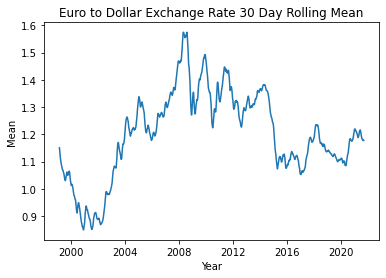

In [9]:
rolling_mean = euro_to_dollar['us_dollar'].rolling(30).mean()
plt.plot(euro_to_dollar['time'],
         rolling_mean)
plt.title('Euro to Dollar Exchange Rate 30 Day Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.show()

In [10]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['us_dollar'].rolling(30).mean()
euro_to_dollar

,time,us_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5873,2021-09-14,1.1814,1.178560
5874,2021-09-15,1.1824,1.178437
5875,2021-09-16,1.1763,1.178147
5876,2021-09-17,1.1780,1.178057


## Create the graph

I have chosen to graph the Euro to Dollar exchange rate before, during, and after US affected recessions since 1999. There have been three recessions during that time defined by the National Bureau of Economic Research and can be found on this [wikipedia page](https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States).

* Early 2000's recession, Mar 2001 - Nov 2001 (8 months)
* Great Recession, Dec 2007 - June 2009 (1 year 6 months)
* COVID-19 recession, Feb 2020 - Apr 2020 (2 months)

The graph will show 1.5 years before and after each recession. 

In [11]:
import matplotlib.style as style
style.use('fivethirtyeight')

In [12]:
# Create the timeframes for each graph

# Early 2000's recession (before)
early_2000_before = euro_to_dollar.copy()[(euro_to_dollar['time'] >= '1999-09-01') & (euro_to_dollar['time'] <= '2001-02-28')]

# Early 2000's recession (during)
early_2000_during = euro_to_dollar.copy()[(euro_to_dollar['time'] >= '2001-03-01') & (euro_to_dollar['time'] <= '2001-11-30')]

# Early 2000's recession (after)
early_2000_after = euro_to_dollar.copy()[(euro_to_dollar['time'] >= '2001-12-01') & (euro_to_dollar['time'] <= '2003-05-31')]

# Great Recession (before)
great_before = euro_to_dollar.copy()[(euro_to_dollar['time'] >= '2006-06-01') & (euro_to_dollar['time'] <= '2007-11-30')]

# Great Recession (during)
great_during = euro_to_dollar.copy()[(euro_to_dollar['time'] >= '2007-12-01') & (euro_to_dollar['time'] <= '2009-06-30')]

# Great Recession (after)
great_after = euro_to_dollar.copy()[(euro_to_dollar['time'] >= '2009-07-01') & (euro_to_dollar['time'] <= '2010-12-31')]

# COVID-19 recession (before)
covid_before = euro_to_dollar.copy()[(euro_to_dollar['time'] >= '2018-08-01') & (euro_to_dollar['time'] <= '2020-01-31')]

# COVID-19 recession (during)
covid_during = euro_to_dollar.copy()[(euro_to_dollar['time'] >= '2020-02-01') & (euro_to_dollar['time'] <= '2020-04-30')]

# COVID-19 recession (after)
covid_after = euro_to_dollar.copy()[(euro_to_dollar['time'] >= '2020-05-01') & (euro_to_dollar['time'] <= '2021-10-31')]

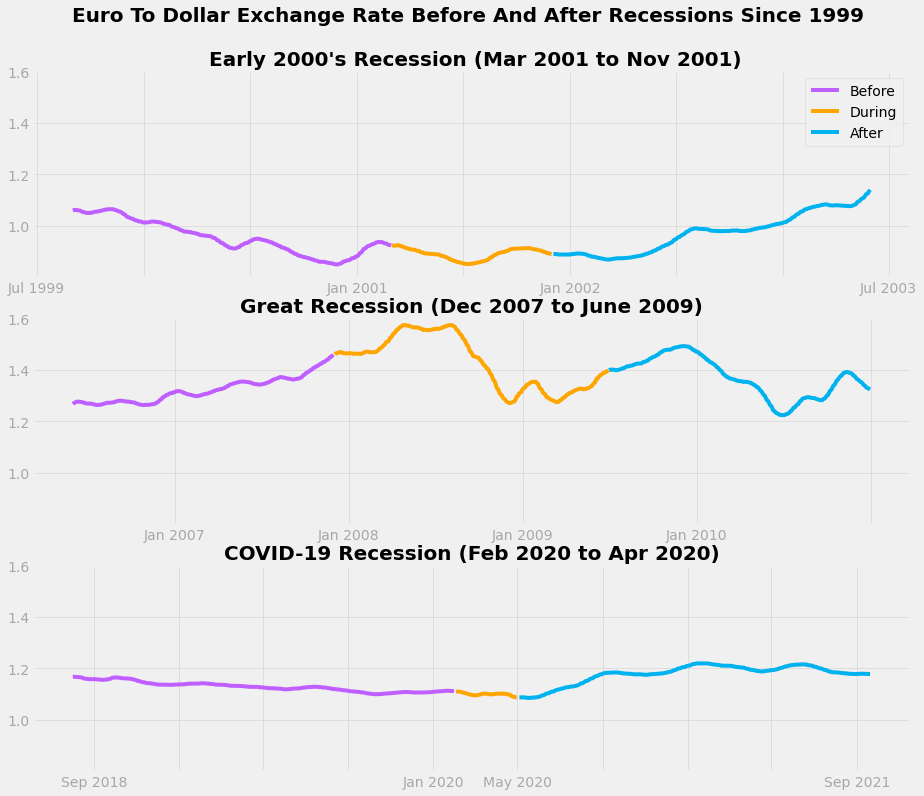

In [40]:
# add the subplots
plt.figure(figsize=(14, 12))
ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2)
ax3 = plt.subplot(3, 1, 3)

axes = [ax1, ax2, ax3]

# changes to all subplots
for ax in axes:
    ax.set_ylim(0.8, 1.6)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels([1.0, 1.2, 1.4, 1.6], alpha=0.3)
    ax.grid(alpha=0.5)
    
# Early 2000's recession
line1, = ax1.plot(early_2000_before['time'],
         early_2000_before['rolling_mean'],
         color='#BF5FFF')
line2, = ax1.plot(early_2000_during['time'],
         early_2000_during['rolling_mean'],
         color='#ffa500')
line3, = ax1.plot(early_2000_after['time'],
         early_2000_after['rolling_mean'],
         color='#00B2EE')
ax1.set_xticklabels(['Jul 1999', '', '', 'Jan 2001', '', 'Jan 2002', '', '', 'Jul 2003'], alpha=0.3)
ax1.legend([line1, line2, line3], ['Before', 'During', 'After'], loc='best')

# Great Recession
ax2.plot(great_before['time'],
         great_before['rolling_mean'],
         color='#BF5FFF')
ax2.plot(great_during['time'],
         great_during['rolling_mean'],
         color='#ffa500')
ax2.plot(great_after['time'],
         great_after['rolling_mean'],
         color='#00B2EE')
ax2.set_xticklabels(['', 'Jan 2007', 'Jan 2008', 'Jan 2009', 'Jan 2010', ''], alpha=0.3)

# COVID-19 recession
ax3.plot(covid_before['time'],
         covid_before['rolling_mean'],
         color='#BF5FFF')
ax3.plot(covid_during['time'],
         covid_during['rolling_mean'],
         color='#ffa500')
ax3.plot(covid_after['time'],
         covid_after['rolling_mean'],
         color='#00B2EE')
ax3.set_xticklabels(['Sep 2018', '', '', '', 'Jan 2020', 'May 2020', '', '', '', 'Sep 2021'], alpha=0.3)

#title
ax1.set_title('Euro To Dollar Exchange Rate Before And After Recessions Since 1999 \n \n Early 2000\'s Recession (Mar 2001 to Nov 2001)',
              fontsize=20, weight='bold')
ax2.set_title('Great Recession (Dec 2007 to June 2009)', fontsize=20, weight='bold')
ax3.set_title('COVID-19 Recession (Feb 2020 to Apr 2020)', fontsize=20, weight='bold')

plt.show()